# Siddhant Thakur- 19A1HP054

## Question 3: K Means [Cluster Analysis]

In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the warnings

In [27]:
import pandas as pd
customers_df = pd.read_csv( r"C:\Sid7\IMT Hyd\T4\MLAP\END TERM DATASET\MLAP ET DATASETS 21 Sep 2020\2_customerspends.csv" )

#importing the dataset

In [4]:
customers_df.head( 5 )


,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#importing the libraries

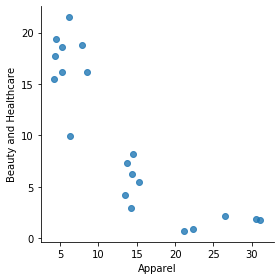

In [6]:
sn.lmplot( "Apparel", "Beauty and Healthcare", data=customers_df, fit_reg = False, size = 4 );

## KMeans Clustering

In [7]:
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( customers_df )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
customers_df["clusterid"] = clusters.labels_

In [9]:
customers_df[0:5]

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.10,0.7,2
1,2,15.23,5.5,2
2,3,5.22,18.6,1
3,4,31.10,1.8,2
4,5,6.12,21.5,1


## Plotting

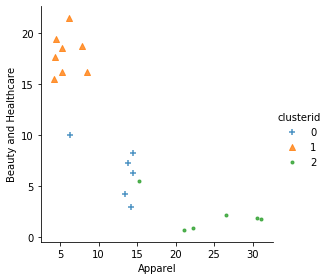

In [10]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare", data=customers_df, hue = "clusterid", fit_reg=False, markers = markers, size = 4 );

## Normalizing

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaled_customers_df = scaler.fit_transform(customers_df[["Apparel", "Beauty and Healthcare"]] )
scaled_customers_df[0:5]

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

In [13]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

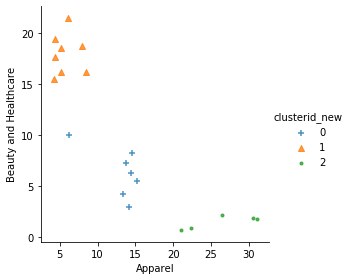

In [15]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",
data=customers_df,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );
#plt.title( "Fig 3: Customer segments created after normalization");

In [16]:
clusters.cluster_centers_

array([[14.        , 12.75      ,  6.47666667],
       [ 9.75      ,  5.74125   , 17.9875    ],
       [ 8.        , 24.47166667,  2.16666667]])

## Cluster Centers and Interpreting the Clusters

In [17]:
customers_df.groupby( 'clusterid' )['Apparel','Beauty and Healthcare'].agg( ["mean",'std'] ).reset_index()

clusterid    Apparel           Beauty and Healthcare          
                  mean       std                  mean       std
0         0  12.750000  3.211230              6.476667  2.605208
1         1   5.741250  1.646003             17.987500  2.001027
2         2  24.471667  6.117158              2.166667  1.736280

# No of Clusters using Dendogram

In [18]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform( customers_df[['Customer','Apparel','Beauty and Healthcare']] )

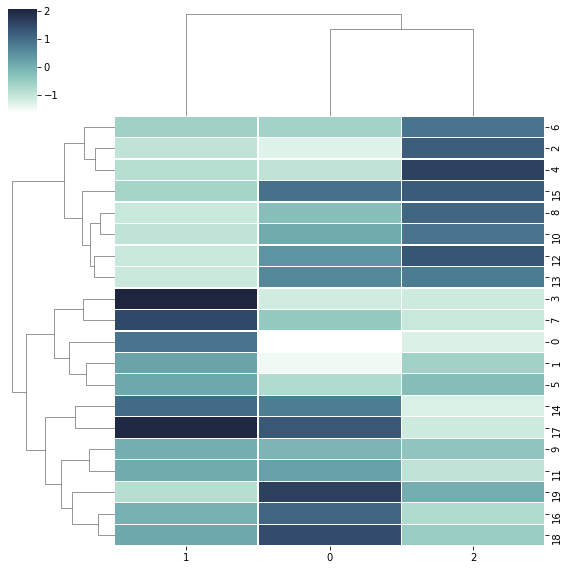

In [19]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_customers_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram of Beer Dataset");

## Finding Optimal Number of Clusters using Elbow Method

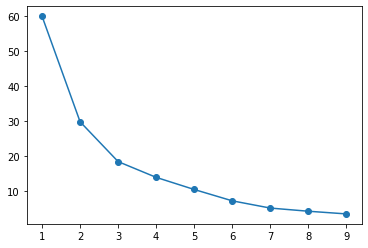

In [20]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_customers_df )
    cluster_errors.append( clusters.inertia_ )

    
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

In [21]:
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_customers_df )
customers_df["clusterid"] = clusters.labels_

In [22]:
customers_df[customers_df.clusterid == 0]

,Customer,Apparel,Beauty and Healthcare,clusterid,clusterid_new
9,10,13.75,7.30,0,0
11,12,14.20,2.90,0,0
14,15,22.30,0.90,0,2
16,17,13.40,4.20,0,0
17,18,30.60,1.90,0,2
18,19,14.40,6.28,0,0
19,20,6.25,9.98,0,0


In [23]:
customers_df[customers_df.clusterid == 1]

,Customer,Apparel,Beauty and Healthcare,clusterid,clusterid_new
2,3,5.22,18.6,1,1
4,5,6.12,21.5,1,1
6,7,8.50,16.2,1,1
8,9,4.34,17.7,1,1
10,11,5.20,16.2,1,1
12,13,4.40,19.4,1,1
13,14,4.25,15.5,1,1
15,16,7.90,18.8,1,1


In [24]:
customers_df[customers_df.clusterid == 2]

,Customer,Apparel,Beauty and Healthcare,clusterid,clusterid_new
0,1,21.10,0.7,2,2
1,2,15.23,5.5,2,0
3,4,31.10,1.8,2,2
5,6,14.50,8.2,2,0
7,8,26.50,2.2,2,2


In [25]:
clusters.cluster_centers_

array([[ 0.9290464 ,  0.34485292, -0.69812237],
       [-0.1300665 , -0.9022739 ,  1.14302204],
       [-1.09255856,  0.96084414, -0.85146395]])

In [26]:
customers_df.groupby( 'clusterid' )['Apparel','Beauty and Healthcare'].agg( ["mean",'std'] ).reset_index()

clusterid    Apparel           Beauty and Healthcare          
                  mean       std                  mean       std
0         0  16.414286  7.792449                4.7800  3.236768
1         1   5.741250  1.646003               17.9875  2.001027
2         2  21.686000  7.166937                3.6800  3.096288